
# 📊 Data Analysis for Student Performance Prediction

## 🔍 Overview
This Jupyter Notebook performs an **exploratory data analysis (EDA)** on the *Students Performance Dataset*. 
It is designed to provide insights into student performance based on various factors, such as study habits, parental involvement, and demographic attributes.

This analysis will help in building models for:
1. **User Story 1: Supervised Learning Model** – Predicting a student’s likelihood of passing based on study habits and past scores.
2. **User Story 2: Clustering Model** – Grouping students based on learning styles for personalized teaching strategies.

[Capstone Project: Kaggle Notebook Link](https://www.kaggle.com/code/rafaelomarhidalgo/capstone-project-building-ai-powered-solutions)


---



## 📦 Step 1: Importing Required Libraries
We begin by importing essential Python libraries:
- **pandas** and **numpy** for data manipulation.
- **matplotlib** and **seaborn** for visualization.


In [11]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 📂 Step 2: Loading the Dataset
The dataset is read into a pandas DataFrame for analysis.


In [12]:

# Load the dataset
file_path = "/kaggle/input/students-performance-dataset/Student_performance_data _.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0



## 📝 Step 3: Understanding the Data
Let's explore the dataset structure, including:
- Column names and data types.
- Presence of missing values.
- Basic statistical summary.


In [13]:

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB

Missing 

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000



## 🎭 Step 4: Exploring Categorical Features
Examining the unique values in categorical columns to understand their distribution.


In [14]:

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")



Unique values in categorical columns:



## 📊 Step 5: Visualizing Numerical Features
Understanding the distribution of numerical variables helps in feature selection and preprocessing.


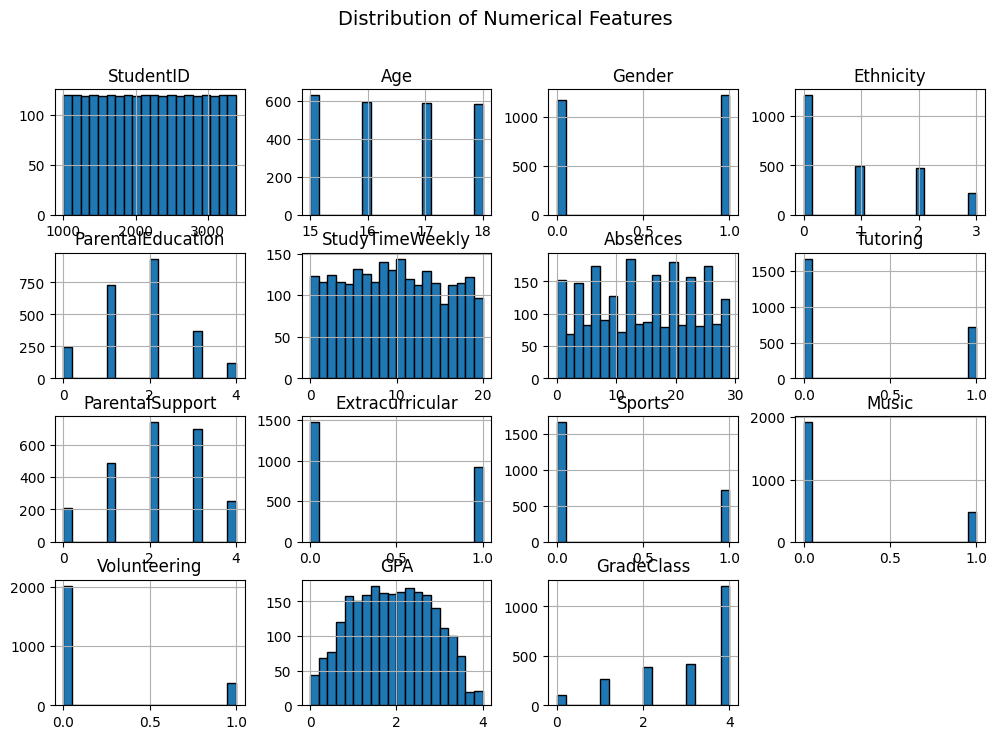

In [15]:

# Visualize the distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()



## 🔗 Step 6: Correlation Analysis
A heatmap of the correlation matrix helps identify relationships between numerical features.


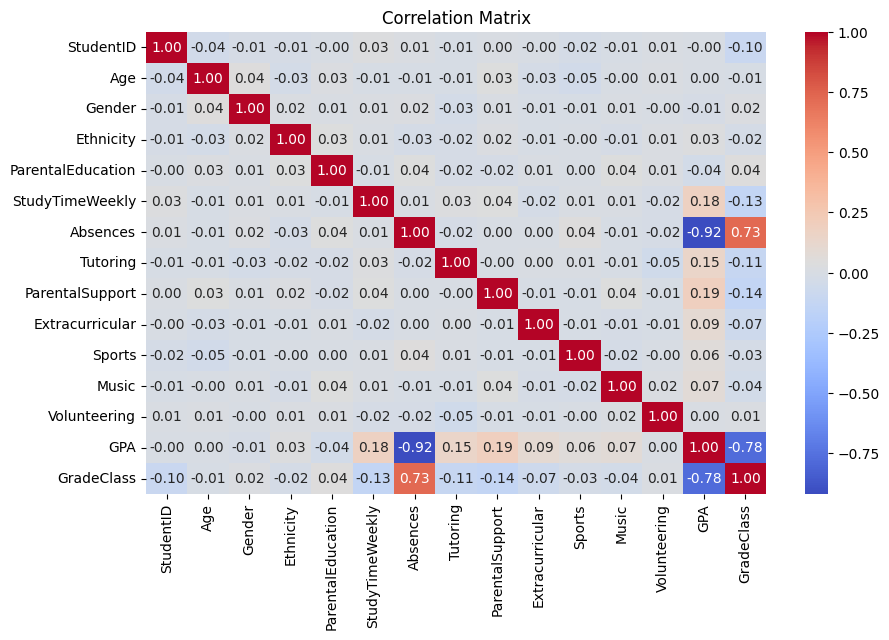

In [16]:

# Check correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



## 📊 Step 7: Visualizing Categorical Features
We analyze categorical variables using **count plots** to understand student distribution across different categories.


In [17]:

# Countplot for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()



## 🔄 Step 8: Encoding Categorical Variables for Model Training
Machine learning models require numerical input. We convert categorical variables into **dummy variables** using one-hot encoding.


In [18]:

# Encoding categorical variables for model training (if needed)
df_encoded = pd.get_dummies(df, drop_first=True)

# Display encoded dataset
print("\nEncoded Dataset Sample:")
display(df_encoded.head())



Encoded Dataset Sample:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### **📌 Next Steps**

Once we analyze the dataset, the next step is:

-   **Feature Selection:** Identify relevant features for prediction (study habits, past scores, tutoring, etc.).
-   **Define Target Variable:** Convert grades into a **binary pass/fail** label for classification.
-   **Build ML Models:** Start with **Logistic Regression** for prediction and **K-Means Clustering** for student grouping.



